In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import autocorrelation_plot

In [14]:
df = pd.read_csv("monthly-us-auto-registration-tho.csv", sep=';')
df2 = pd.read_csv("weekly-closings-of-the-dowjones-.csv", sep = ',')

In [15]:
df.columns = ['Month', 'Count']
df2.columns = ['Week', 'Count']

# Считаем автокорреляцию

In [16]:
for i in range(12):
    print(i, df['Count'].autocorr(i + 1))

0 0.8618449018346641
1 0.7913544160742754
2 0.751370060756448
3 0.7349520533682049
4 0.725840578998287
5 0.7080863165817729
6 0.692850931547973
7 0.6743543102961018
8 0.6462826787744929
9 0.6431983489338652
10 0.6811647481617276
11 0.7701238089589392


# Делаем ряд стационарным

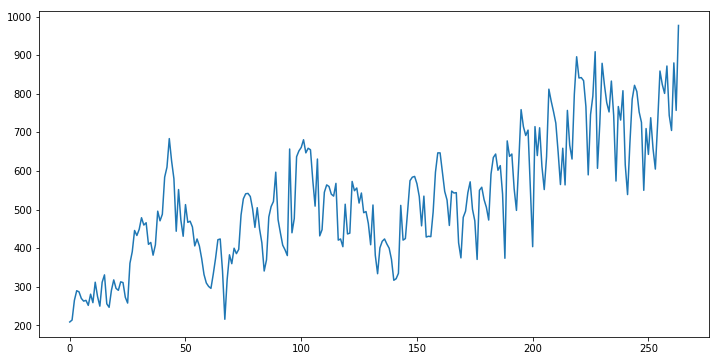

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df['Count'])
plt.show()

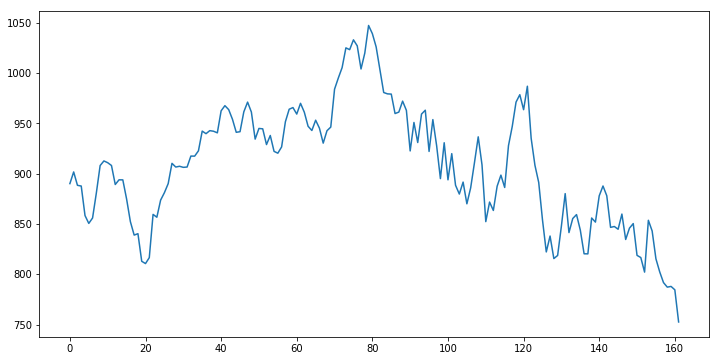

In [22]:
plt.figure(figsize=(12,6))
plt.plot(df2['Count'])
plt.show()

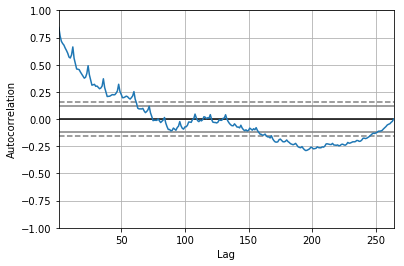

In [18]:
autocorrelation_plot(df['Count'])
plt.show()

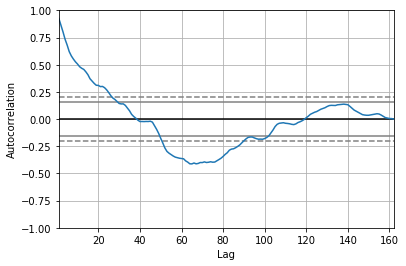

In [23]:
autocorrelation_plot(df2['Count'])
plt.show()

## Нормализуем дисперсию

In [19]:
from scipy.stats import boxcox

In [20]:
modified = boxcox(df['Count'], 0)

In [21]:
modified2 = boxcox(df2['Count'], 0)

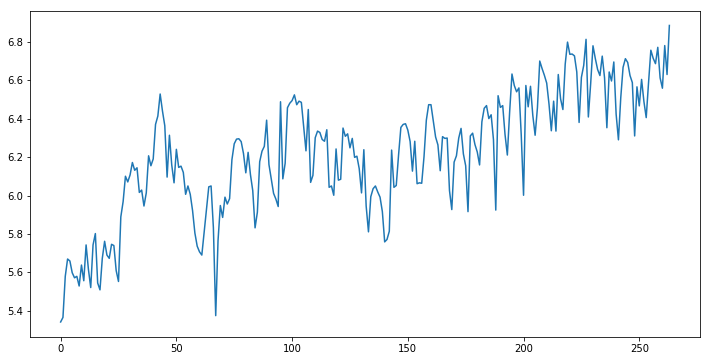

In [24]:
plt.figure(figsize=(12,6))
plt.plot(modified)
plt.show()

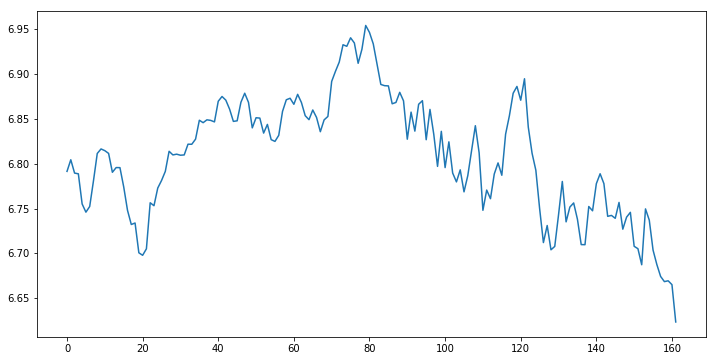

In [25]:
plt.figure(figsize=(12,6))
plt.plot(modified2)
plt.show()

## Дифференцируем

In [26]:
import numpy as np

In [27]:
modified = np.diff(modified, 2)
modified2 = np.diff(modified2, 2)

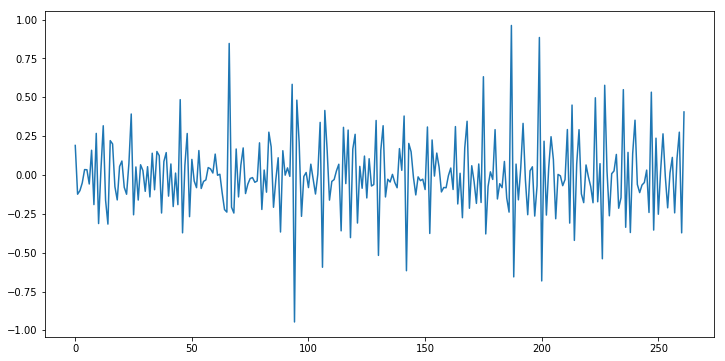

In [28]:
plt.figure(figsize=(12,6))
plt.plot(modified)
plt.show()

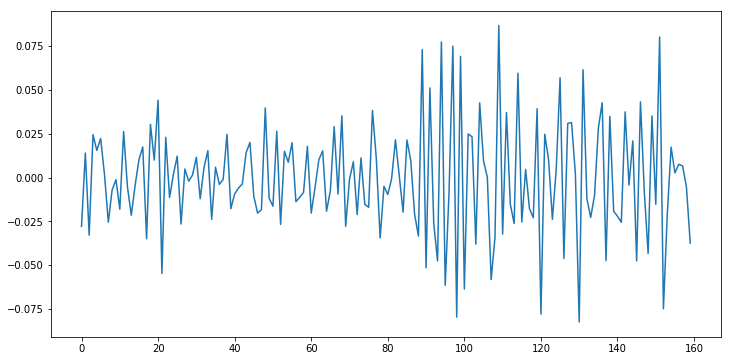

In [29]:
plt.figure(figsize=(12,6))
plt.plot(modified2)
plt.show()

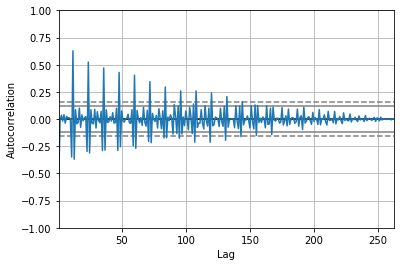

In [30]:
autocorrelation_plot(modified)
plt.show()

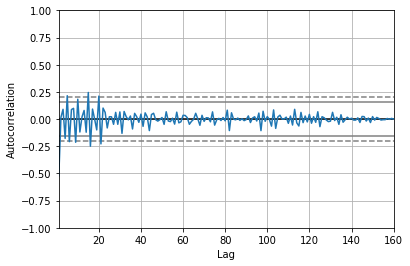

In [31]:
autocorrelation_plot(modified2)
plt.show()

# Тест Дики-Фуллера

In [32]:
from statsmodels.tsa.stattools import adfuller

In [33]:
################
 # Dickey-Fuller
##################
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [34]:
test_stationarity(df['Count'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.225039
p-value                          0.662733
#Lags Used                      15.000000
Number of Observations Used    248.000000
Critical Value (1%)             -3.456996
Critical Value (5%)             -2.873266
Critical Value (10%)            -2.573019
dtype: float64


In [35]:
test_stationarity(modified)

Results of Dickey-Fuller Test:
Test Statistic                -1.075967e+01
p-value                        2.539779e-19
#Lags Used                     1.200000e+01
Number of Observations Used    2.490000e+02
Critical Value (1%)           -3.456888e+00
Critical Value (5%)           -2.873219e+00
Critical Value (10%)          -2.572994e+00
dtype: float64


In [36]:
test_stationarity(modified2)

Results of Dickey-Fuller Test:
Test Statistic                  -5.099378
p-value                          0.000014
#Lags Used                      14.000000
Number of Observations Used    145.000000
Critical Value (1%)             -3.476273
Critical Value (5%)             -2.881688
Critical Value (10%)            -2.577513
dtype: float64


Тесты Дики-Фуллера показывают что ряды удалось привести к стационарному виду

In [37]:
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [38]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

/home/pavel/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


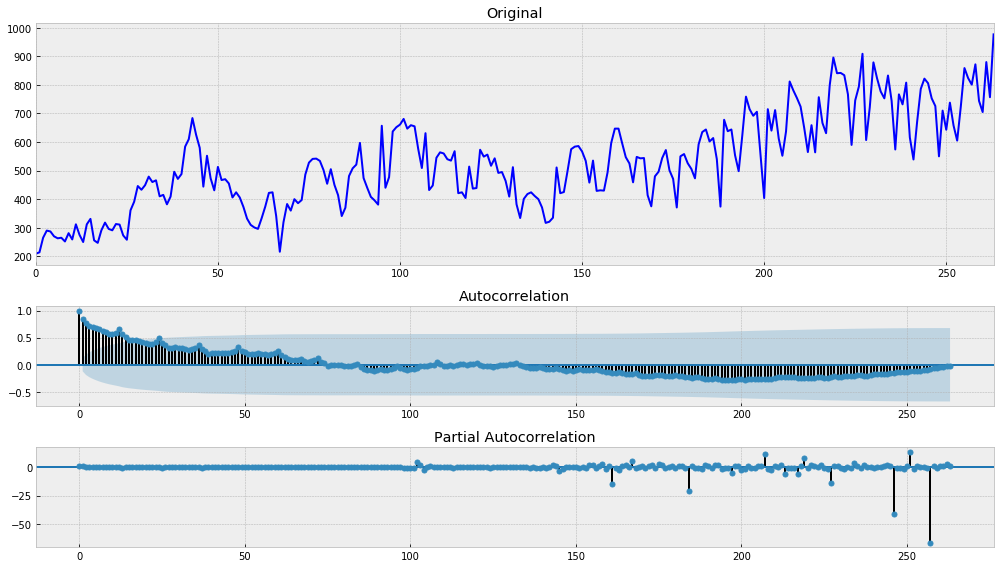

In [39]:
tsplot(df['Count'])

/home/pavel/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


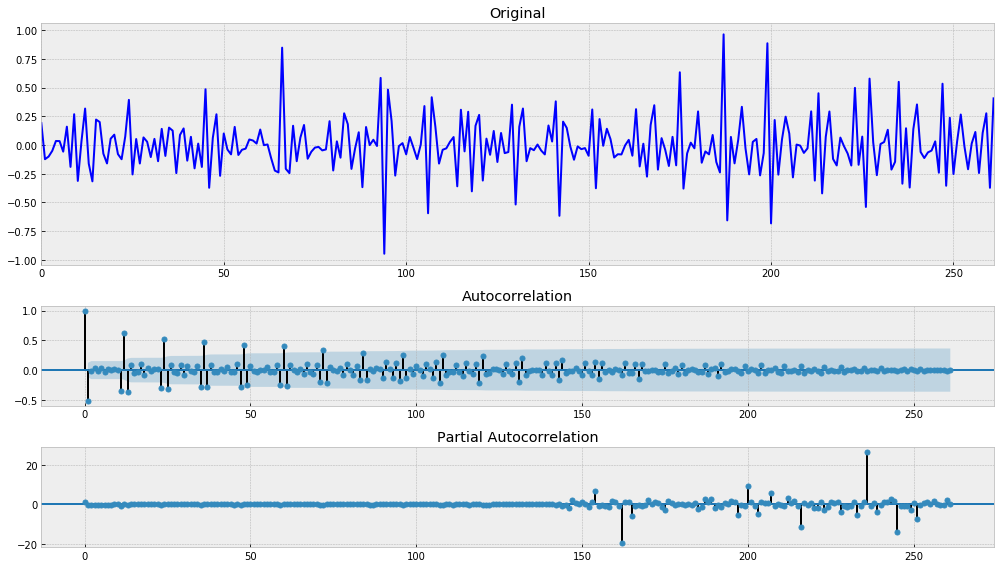

In [40]:
tsplot(modified)

/home/pavel/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


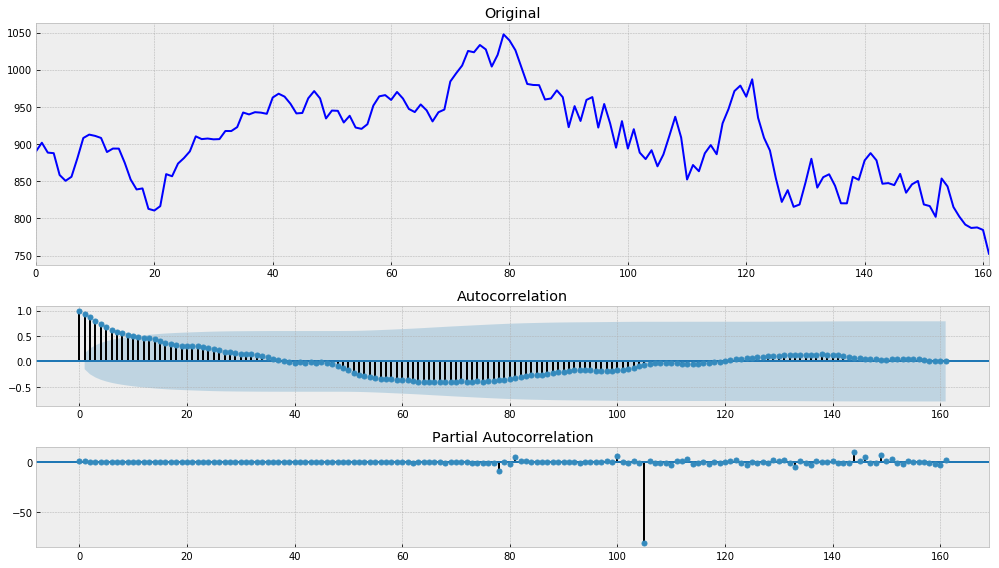

In [41]:
tsplot(df2['Count'])

/home/pavel/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


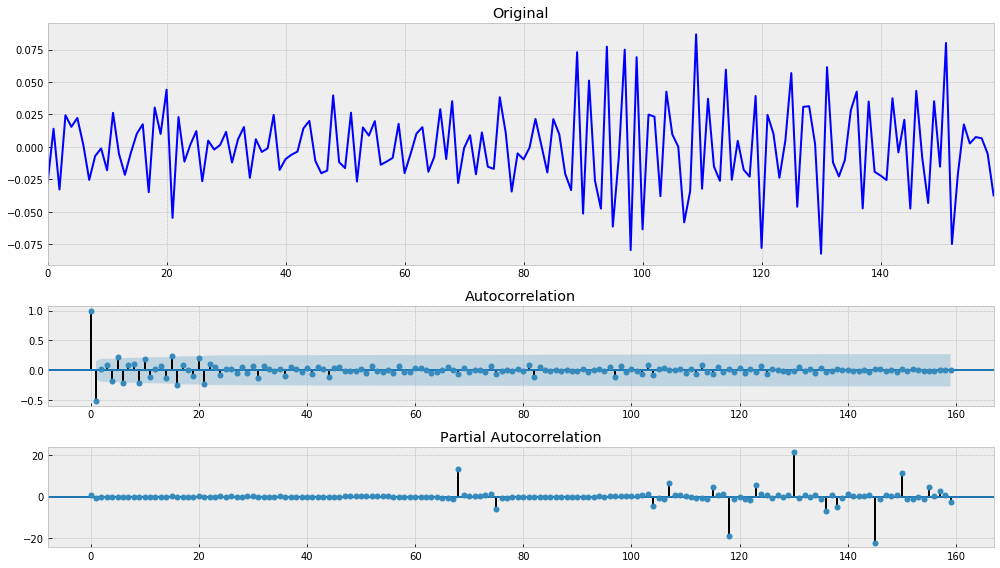

In [42]:
tsplot(modified2)

Графики коррелограм показывают также что ряды стационарны